<a href="https://colab.research.google.com/github/Vladislav-7-AV/ML-theory/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Логистическая регрессия

# План занятия

1. Перейдем от линейной регрессии к логистической регрессии
1. Осознаем, что такое правдоподобие
2. Выведем из правдоподобия функцию потерь logloss
3. Построим с нуля логистическую регрессию
4. Пообучаем логистическую регрессию из sklearn
5. Визуализируем предсказания логистической регрессии

# Что нужно знать перед занятием


1. Логистическая регрессия. Теория https://youtu.be/9BoVCdedvW8
2. Линейная регрессия https://youtu.be/KJA9A1q9l7E


# Поддержка

✏️ https://boosty.to/machine_learrrning


<img src='https://drive.google.com/uc?id=1EYkU2bG7qko-8gayaB5azZptDn3fgFu_'>
            

✏️ https://vk.com/machine_learrrning



<img src='https://drive.google.com/uc?id=1h7uCrnRkzT8x2E-VZFQ_Uh5lVuswbvRW'>
            

Вспомним **Линейную регрессию** — модель зависимости переменной от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости.

Ниже на графике представлена линейная регрессия переменной $y$ от переменной $x$.

Есть коэффициент наклона $a$ и есть коэффициент сдвига $b$.

Эти значения могут изменяться как угодно.

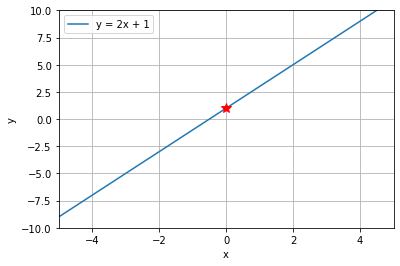

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-6, 6)
a = 2
b = 1

y = a * x + b
plt.plot(x, y, label=f'y = {a}x + {b}')
plt.plot([0], [b], 'r*', markersize=10)
plt.ylabel('y');plt.xlabel('x')
plt.ylim(-10, 10);plt.xlim(-5, 5)
plt.grid()
plt.legend();

Возьмем и сами нагенирируем себе данные и обучим на них линейную модель.

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, n_features=2, random_state=12, centers=2)

display(X, y)

array([[ -5.2000508 ,   1.03101087],
       [ -6.26268518,   1.70399904],
       [ -6.09933951,  -0.51965652],
       [ -2.90487898,  -0.32621368],
       [ -7.51456607,   5.27345092],
       [ -7.91394699,   4.08713764],
       [ -4.93302704,   0.93256045],
       [ -6.27598204,   5.3283266 ],
       [ -3.73275694,   0.62337287],
       [ -6.88132681,   4.12304857],
       [ -5.30551643,   0.07148875],
       [ -8.59849966,   3.01289968],
       [ -7.2543384 ,   4.21572565],
       [ -3.2624657 ,   2.31125078],
       [ -3.79012431,   1.03243209],
       [ -6.41487085,   4.93984011],
       [ -6.16360032,   3.26627259],
       [ -7.94627336,   6.01079038],
       [ -3.86173157,  -0.77157158],
       [ -7.44514747,   4.76178476],
       [ -6.7017672 ,   4.41663513],
       [ -5.58091181,   5.11965922],
       [ -6.82539091,   0.82134757],
       [ -6.91161607,   4.68076626],
       [ -7.03166309,   7.04281172],
       [ -4.83896768,   1.18681003],
       [ -5.42257839,   1.47741832],
 

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X.mean(axis=0), X.std(axis=0)

(array([-7.77156117e-17, -2.22044605e-16]), array([1., 1.]))

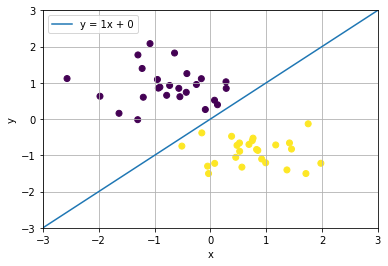

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3, 4)
a = 1
b = 0

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(x, a * x + b, label=f'y = {a}x + {b}')
plt.ylabel('y');plt.xlabel('x')
plt.ylim(-3, 3);plt.xlim(-3, 3)
plt.grid()
plt.legend();

# Одномерная логистическая регрессия

## LogisticRegression

### Обучение LogisticRegression из sklearn

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=25, n_features=1, n_informative=1,
                           n_redundant=0, random_state=11, n_clusters_per_class=1,
                           class_sep=0.4)

display(X, y)

array([[-0.86305361],
       [-1.4372011 ],
       [ 0.19592225],
       [-0.87164985],
       [ 0.00982831],
       [ 1.30282593],
       [ 0.16134434],
       [-0.9223264 ],
       [-0.10173176],
       [ 0.41006497],
       [ 0.27129997],
       [-0.71111212],
       [-2.98259876],
       [-0.09300387],
       [ 0.82285659],
       [ 0.16493473],
       [-0.40806382],
       [ 0.62136283],
       [ 0.76258897],
       [-0.11001122],
       [-1.26261842],
       [ 0.04513441],
       [ 0.50026937],
       [-0.6784482 ],
       [ 0.2182344 ]])

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1])

In [ ]:
X.mean(axis=0), X.std(axis=0)

(array([-0.19820608]), array([0.87333629]))

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.mean(axis=0), X.std(axis=0)

(array([1.77635684e-17]), array([1.]))

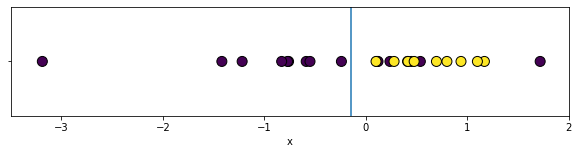

In [ ]:
plt.figure(figsize=(10, 2))
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
plt.plot([-0.15, -0.15], [-1, 1])
plt.ylabel('');plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.ylim(-1, 1);plt.xlim(-3.5, 2);

y = a* x + b<br>
**a - ? b - ?**

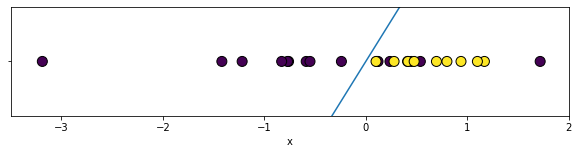

In [ ]:
plt.figure(figsize=(10, 2))
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')

x = np.linspace(-3, 3)
plt.plot(x, 3*x + 0)
plt.ylabel('');plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.ylim(-1, 1);plt.xlim(-3.5, 2);

Возьмем модель `LogisticRegression` из `sklearn` из модуля `linear_model`.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model

LogisticRegression()

In [ ]:
model.fit(X, y)

LogisticRegression()

In [ ]:
model.coef_, model.intercept_

(array([[1.34494091]]), array([-0.19801197]))

In [ ]:
model_a = model.coef_[0]
model_b = model.intercept_

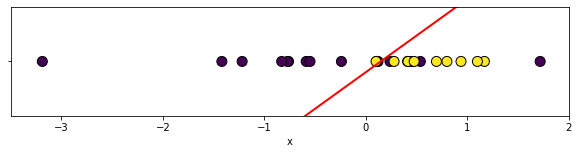

In [ ]:
model_y_sk = model_a * x + model_b

plt.figure(figsize=(10, 2))
plt.plot(x, model_y_sk, linewidth=2, c='r')
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
plt.ylabel('');plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.ylim(-1, 1);plt.xlim(-3.5, 2);

In [ ]:
model.score(X, y)

0.8

Чтобы теперь сделать предсказания этой моделью достаточно вызвать метод `predict` и передать в него данные.

In [ ]:
y_pred_cl = model.predict(X)
y_pred_cl[:5]

array([0, 0, 1, 0, 1])

Или же можем можем сделать точно такое же предсказание, если возьмем коэффициент наклона и умножим на значение признака и прибавим к этому коэффициент сдвига.

In [ ]:
y_pred = model_a * X + model_b
y_pred[:5]

array([[-1.22187946],
       [-2.1060686 ],
       [ 0.40894703],
       [-1.23511771],
       [ 0.12236172]])

In [ ]:
y_pred_cl = model.predict(X)
y_pred_cl[:5]

array([0, 0, 1, 0, 1])

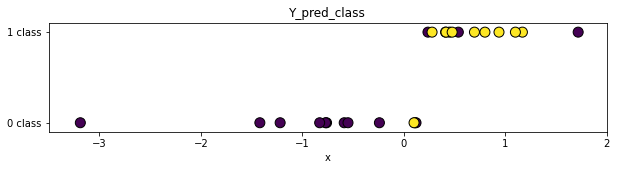

In [ ]:
plt.figure(figsize=(10, 2))
plt.scatter(X, y_pred_cl, c=y, s=100, edgecolors='black')
plt.ylabel('');plt.xlabel('x')
plt.yticks(np.arange(0, 2), ['0 class', '1 class'])
plt.ylim(-0.1, 1.1);plt.xlim(-3.5, 2)
plt.title('Y_pred_class');

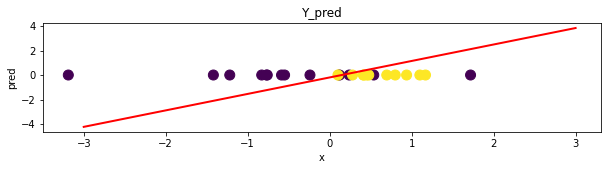

In [ ]:
model_y_sk = model_a * x + model_b

plt.figure(figsize=(10, 2))
plt.plot(x, model_y_sk, linewidth=2, c='r')
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100)
plt.ylabel('pred');plt.xlabel('x')
plt.title('Y_pred');

In [ ]:
pred_proba = model.predict_proba(X)
pred_proba[:5]

array([[0.77239413, 0.22760587],
       [0.89149162, 0.10850838],
       [0.39916463, 0.60083537],
       [0.77471304, 0.22528696],
       [0.46944768, 0.53055232]])

In [ ]:
pred_proba = pred_proba[:, 1]
pred_proba[:5]

array([0.22760587, 0.10850838, 0.60083537, 0.22528696, 0.53055232])

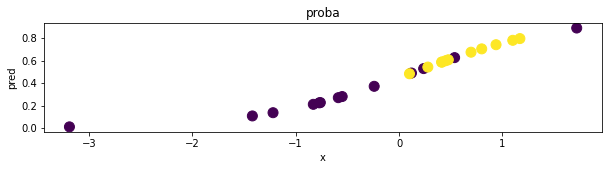

In [ ]:
plt.figure(figsize=(10, 2))
plt.scatter(X, pred_proba, c=y, s=100)
plt.ylabel('pred');plt.xlabel('x')
plt.title('proba');

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

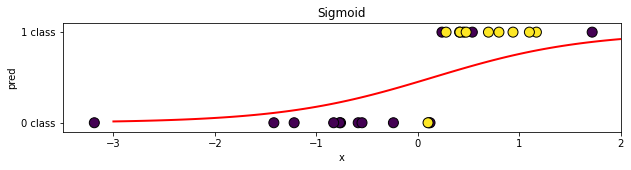

In [ ]:
x = np.linspace(-3, 3, num=100)
model_y_sk = model_a * x + model_b

plt.figure(figsize=(10, 2))
plt.plot(x, sigmoid(model_y_sk), linewidth=2, c='r')
plt.scatter(X, y_pred_cl, c=y, s=100, edgecolors='black')
plt.ylabel('pred');plt.xlabel('x')
plt.yticks(np.arange(0, 2), ['0 class', '1 class'])
plt.ylim(-0.1, 1.1);plt.xlim(-3.5, 2)
plt.title('Sigmoid');

**Logistic Regression = Linear Regression + Sigmoid**

### Сравнение моделей

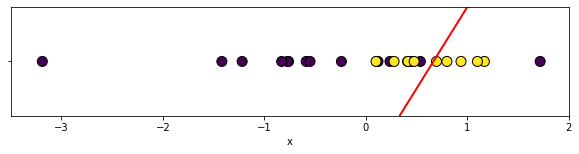

In [ ]:
a = 3
b = -2
model_y = a * x + b


plt.figure(figsize=(10, 2))
plt.plot(x, model_y, linewidth=2, c='r')
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
plt.ylabel('');plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.ylim(-1, 1);plt.xlim(-3.5, 2);

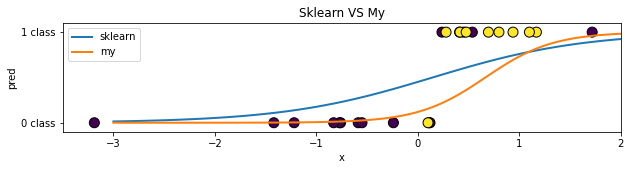

In [ ]:
plt.figure(figsize=(10, 2))
plt.plot(x, sigmoid(model_y_sk), linewidth=2, label='sklearn')
plt.plot(x, sigmoid(model_y), linewidth=2, label='my')
plt.scatter(X, y_pred_cl, c=y, s=100, edgecolors='black')
plt.ylabel('pred');plt.xlabel('x')
plt.yticks(np.arange(0, 2), ['0 class', '1 class'])
plt.ylim(-0.1, 1.1);plt.xlim(-3.5, 2)
plt.title('Sklearn VS My')
plt.legend();

Составим все данные в одну таблицу:
- `X` - это точки, на которых строим модель
- `y` - это настоящая целевая переменная, которую хотим предсказать
- `pred_model_good` - это значения на линии по координатам `X` первой модели, имеем предсказания модель `LinearRegression`
- и `pred_bad_model` - это значения на линии по координатам `X` второй модели, которая создана вручную, а не силами `sklearn`

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'X': np.squeeze(X),
    'y': y,
    'pred_sk_model': sigmoid(np.squeeze(model_a * X + model_b)),
    'pred_my_model': sigmoid(np.squeeze(a * X + b))
})


df.head()

,X,y,pred_sk_model,pred_my_model
0,-0.761273,0,0.227606,0.013602
1,-1.418692,0,0.108508,0.001915
2,0.451290,1,0.600835,0.343862
3,-0.771116,0,0.225287,0.013212
4,0.238207,0,0.530552,0.216636


In [ ]:
df['sk_class'] = (df['pred_sk_model'] > 0.5).astype('int')
df['my_class'] = (df['pred_my_model'] > 0.5).astype('int')
df.head()

,X,y,pred_sk_model,pred_my_model,sk_class,my_class
0,-0.761273,0,0.227606,0.013602,0,0
1,-1.418692,0,0.108508,0.001915,0,0
2,0.451290,1,0.600835,0.343862,1,0
3,-0.771116,0,0.225287,0.013212,0,0
4,0.238207,0,0.530552,0.216636,1,0


Посчитаем отклонения предсказаний от истины для каждой модели.

In [ ]:
df.shape[0]

25

In [ ]:
df[df['sk_class'] != df['y']]

,X,y,pred_sk_model,pred_my_model,sk_class,my_class
4,0.238207,0,0.530552,0.216636,1,0
5,1.718733,0,0.892216,0.959152,1,1
8,0.110466,1,0.487642,0.158611,0,0
10,0.537601,0,0.628323,0.404392,1,0
19,0.100986,1,0.484457,0.154852,0,0


In [ ]:
(df['sk_class'] == df['y']).sum()

20

In [ ]:
(df['my_class'] == df['y']).sum()

17

### Правдоподобие


https://www.kaggle.com/code/dansbecker/what-is-log-loss

Правдоподобие (Likelihood) показывает насколько вероятным, по мнению модели, был наблюдаемый набор результатов.

<img src='https://miro.medium.com/max/1200/1*jxZFpWtCbD4jHPV0DdDuMA.gif'>

In [ ]:
df.head(3)

,X,y,pred_sk_model,pred_my_model,sk_class,my_class
0,-0.761273,0,0.227606,0.013602,0,0
1,-1.418692,0,0.108508,0.001915,0,0
2,0.451290,1,0.600835,0.343862,1,0


Предсказания модели [0.22, 0.10, 0.60]. Первые два имеют 0 класс, а третий 1 класс.

Для 3-го объекта модель говорит, что с вероятностью 60% он относится к 1 классу. Значит правдоподобие для одной точки 0.60.




Для 2 объекта модель говорит, что с вероятностью $10%$ он относится к 1 классу, получается с вероятностью $90%$ он относится к 0 классу, правдоподобие для этой точки $0.90$ и мы его перемножаем с $0.60$.

Тоже самое с 1 объектом, вероятность быть 1 классом - $22%$, значит $78%$, что точка принадлежит 0 классу, перемножаем это на $0.78 \cdot 0.60 \cdot 0.90$


In [ ]:
0.78 * 0.60 * 0.90

0.42119999999999996

Теперь сделаем для всех точек

In [ ]:
likelihood_1 = np.prod(df[df['y'] == 1]['pred_sk_model'])
likelihood_1

0.003618308869915949

In [ ]:
likelihood_0 = np.prod(1 - df[df['y'] == 0]['pred_sk_model'])
likelihood_0

0.001127745959945556

In [ ]:
likelihood = likelihood_1 * likelihood_0
likelihood

4.080533209882882e-06

In [ ]:
likelihood / df.shape[0]

1.6322132839531528e-07

In [ ]:
- np.log(likelihood) / df.shape[0]

0.49637131557561776

In [ ]:
from sklearn.metrics import log_loss

log_loss(y, df['pred_sk_model'])

0.49637131557561776

In [ ]:
-np.log(np.prod(df[df['y'] == 1]['pred_my_model']) * np.prod(1 - df[df['y'] == 0]['pred_my_model']))  / df.shape[0]

0.6310887863810843

In [ ]:
log_loss(y, df['pred_my_model'])

0.6310887863810843

### Logloss (cross entropy)

$$\prod p_i^{y_i} (1-p_i)^{1-y_i} → max$$


$ \log_a{bc} = \log_a{b} + \log_a{c}$

$$log loss = \sum (log(p_i)^{y_i} + log(1 - p_i)^{1-y_i})$$



$ \log_a{b^c}= c \cdot \log_a{b}$

$$log loss = - \frac{1}{n}\sum (y_i \cdot log(p_i) + (1-y_i) \cdot log(1 - p_i)) → min $$

In [ ]:
- (np.sum(np.log(df[df['y'] == 1]['pred_sk_model'])) + np.sum(np.log(1 - df[df['y'] == 0]['pred_sk_model']))) / df.shape[0]

0.49637131557561776

In [ ]:
- (np.sum(np.log(df[df['y'] == 1]['pred_my_model'])) + np.sum(np.log(1 - df[df['y'] == 0]['pred_my_model']))) / df.shape[0]

0.6310887863810843

## Как обучается логистическая регрессия

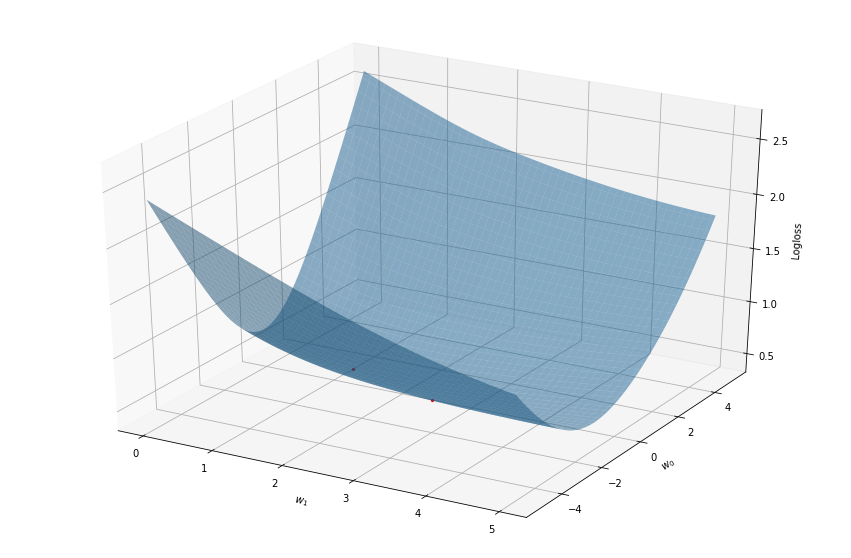

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def logloss(w1, w0):
    y_pred = sigmoid(w1 * X + w0)
    return log_loss(y, y_pred)


coefs_a = np.linspace(0, 5, num=100)
coefs_b = np.linspace(-5, 5, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([logloss(i, j) for i, j in zip(np.ravel(w1), np.ravel(w0))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w1, w0, Z, alpha=.5)
ax.scatter(model_a, model_b, logloss(model_a, model_b), c='r', s=5)
ax.scatter(a, b, logloss(a, b), c='r', s=5)

ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_0$')
ax.set_zlabel('Logloss')

plt.show()

In [ ]:
X

array([[-0.76127322],
       [-1.41869179],
       [ 0.45129046],
       [-0.77111621],
       [ 0.23820651],
       [ 1.71873313],
       [ 0.41169756],
       [-0.82914259],
       [ 0.11046641],
       [ 0.69649121],
       [ 0.53760054],
       [-0.587295  ],
       [-3.1882251 ],
       [ 0.12046015],
       [ 1.16915177],
       [ 0.41580869],
       [-0.2402943 ],
       [ 0.93843451],
       [ 1.10014328],
       [ 0.10098614],
       [-1.21878863],
       [ 0.27863321],
       [ 0.79977834],
       [-0.54989369],
       [ 0.47683863]])

In [ ]:
X = np.c_[np.ones_like(X), X]
X

array([[ 1.        , -0.76127322],
       [ 1.        , -1.41869179],
       [ 1.        ,  0.45129046],
       [ 1.        , -0.77111621],
       [ 1.        ,  0.23820651],
       [ 1.        ,  1.71873313],
       [ 1.        ,  0.41169756],
       [ 1.        , -0.82914259],
       [ 1.        ,  0.11046641],
       [ 1.        ,  0.69649121],
       [ 1.        ,  0.53760054],
       [ 1.        , -0.587295  ],
       [ 1.        , -3.1882251 ],
       [ 1.        ,  0.12046015],
       [ 1.        ,  1.16915177],
       [ 1.        ,  0.41580869],
       [ 1.        , -0.2402943 ],
       [ 1.        ,  0.93843451],
       [ 1.        ,  1.10014328],
       [ 1.        ,  0.10098614],
       [ 1.        , -1.21878863],
       [ 1.        ,  0.27863321],
       [ 1.        ,  0.79977834],
       [ 1.        , -0.54989369],
       [ 1.        ,  0.47683863]])

Реализуем функцию:
1. logloss - функция логистической функции потерь (cross entropy) $logloss = - \frac{1}{n}\sum (y_i \cdot log(p_i) + (1-y_i) \cdot log(1 - p_i))$


2. gr_logloss - градиент функции logloss записанные в матричном виде. $X^{T}(\sigma(XW)-Y)$


Если интересно, как он получился, дайте мне знать в комментариях к видео.

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def logloss(y, y_proba):
    logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30))
    logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
    logloss_total = -(logloss_0 + logloss_1) / len(y)
    return logloss_total


def gr_logloss(X, W, y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y_proba - y)
    return grad

In [ ]:
test_y     = [1, 0]
test_proba = [0, 1]
logloss(test_y, test_proba), log_loss(test_y, test_proba)

(34.538776394910684, 34.53917619362578)

Итерация: 0
Logloss 0.7809352018720266
Accuracy 0.16
--------------------------------------------------------
Итерация: 80
Logloss 0.5979220700310761
Accuracy 0.84
--------------------------------------------------------
Итерация: 160
Logloss 0.5122672986031042
Accuracy 0.84
--------------------------------------------------------
Итерация: 240
Logloss 0.48223175784563155
Accuracy 0.84
--------------------------------------------------------


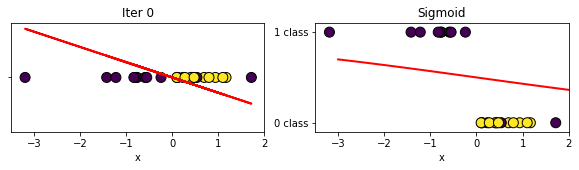

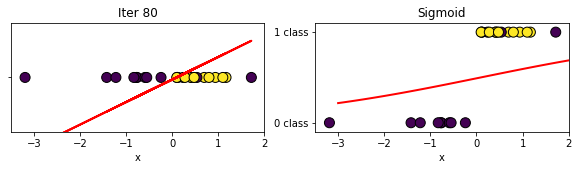

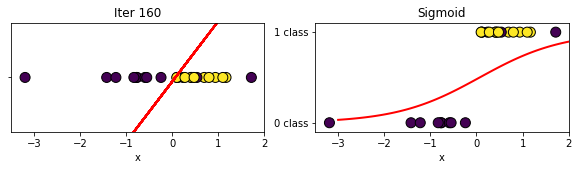

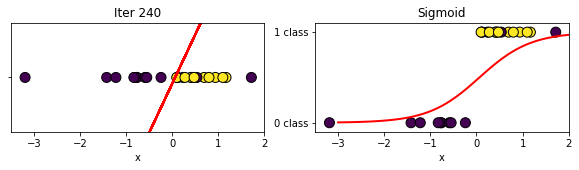

In [ ]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# первоначальное точка
np.random.seed(9)
W = np.random.randn(X.shape[1])

# размер шага (learning rate)
learning_rate = 0.001

next_W = W

# количество итерация
n = 250
for i in range(n):
    cur_W = next_W

    # движение в негативную сторону вычисляемого градиента
    next_W = cur_W - learning_rate * gr_logloss(X, W, y)

    # остановка когда достигнута необходимая степень точности
    if np.linalg.norm(cur_W - next_W) <= eps:
        break

    if i % 80 == 0:
        print(f"Итерация: {i}")
        # print(f"Текущая точка {cur_W}| Следующая точка {next_W}")
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print(f"Logloss {logloss(y, y_proba)}")
        print(f"Accuracy {accuracy}")
        print("--------------------------------------------------------")

        model_grad = next_W @ X.T
        plt.figure(figsize=(10, 2))

        plt.subplot(121)
        plt.plot(X[:, 1], model_grad, linewidth=2, c='r', label='gradient')
        plt.scatter(X[:, 1], np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
        plt.ylabel('');plt.xlabel('x')
        plt.yticks(np.arange(0, 1), [''])
        plt.title(f'Iter {i}')
        plt.ylim(-1, 1);plt.xlim(-3.5, 2);


        plt.subplot(122)
        x_ones = np.c_[np.ones_like(x), x]
        model_pred_x = next_W @ x_ones.T

        plt.plot(x, sigmoid(model_pred_x), linewidth=2, c='r')
        plt.scatter(X[:, 1], sigmoid(model_grad) >= 0.5, c=y, s=100, edgecolors='black')
        plt.ylabel('');plt.xlabel('x')
        plt.yticks(np.arange(0, 2), ['0 class', '1 class'])
        plt.ylim(-0.1, 1.1);plt.xlim(-3.5, 2)
        plt.title('Sigmoid');

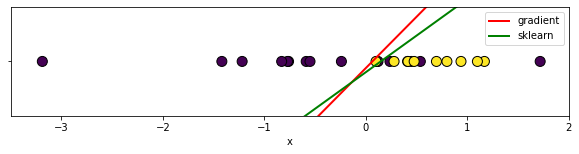

In [ ]:
model_grad = next_W[1] * x + next_W[0]


plt.figure(figsize=(10, 2))
plt.plot(x, model_grad, linewidth=2, c='r', label='gradient')
plt.plot(x, model_y_sk, linewidth=2, c='g', label='sklearn')
plt.scatter(X[:, 1], np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
plt.ylabel('');plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.legend()
plt.ylim(-1, 1);plt.xlim(-3.5, 2);

In [ ]:
y_proba = sigmoid(X @ next_W)
y_proba

array([0.17397633, 0.05746958, 0.67451307, 0.17132527, 0.58100106,
       0.95765024, 0.65791435, 0.15634526, 0.52149209, 0.76692197,
       0.70918156, 0.22624161, 0.00216344, 0.52619232, 0.88916558,
       0.65965685, 0.36000043, 0.83851398, 0.87567825, 0.51702983,
       0.08163167, 0.59943501, 0.79991558, 0.23882479, 0.68499901])

In [ ]:
np.where(y_proba > 0.5, 1, 0)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1])

# Многомерная логистическая регрессия




In [ ]:
X, y = make_classification(n_samples=50, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=11)

display(X, y)

array([[-0.58426249, -0.26304715],
       [-0.87385157,  0.03334535],
       [-0.83376357,  0.56089118],
       [-0.36054172,  1.23330648],
       [-0.96996002, -0.51336961],
       [ 0.87096085, -1.33644586],
       [ 0.88714034, -0.49693129],
       [-0.97267638,  1.8062936 ],
       [-1.56089158,  0.81454957],
       [ 1.05054058, -1.36505594],
       [ 0.9851866 , -0.87000251],
       [ 1.55985218,  2.83593357],
       [ 0.93879173, -0.6224016 ],
       [ 0.33585538,  0.73504779],
       [-0.93897517,  1.18220327],
       [-0.88659662, -0.73309719],
       [-0.89879515, -1.59444315],
       [ 1.09571977,  2.02411724],
       [-1.59503021, -0.40847071],
       [-1.17747512,  0.84767099],
       [-1.21644763, -1.06794308],
       [-1.04836107, -0.67305344],
       [-0.94654293, -0.87003831],
       [-0.79154717, -0.19781098],
       [ 0.94786239,  2.68547589],
       [ 1.25268747,  0.85946774],
       [-1.21287477, -1.06611934],
       [ 1.0820104 , -0.72574433],
       [ 3.08649247,

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0])

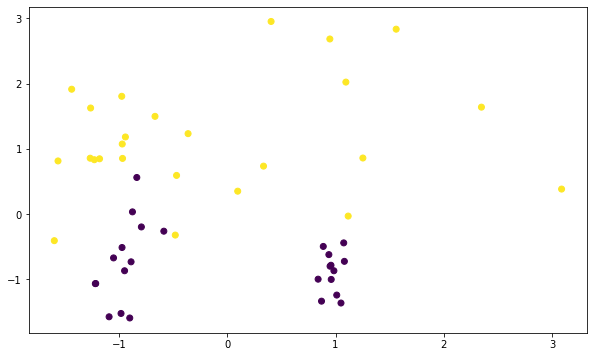

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y);

### Из sklearn

Обучим для начала модель из `sklearn`

In [ ]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [ ]:
model.coef_, model.intercept_

(array([[0.02774742, 2.37815401]]), array([-0.10805746]))

In [ ]:
model.predict(X[:1])

array([0])

In [ ]:
np.sum(model.coef_ * X[0]) + model.intercept_

array([-0.74983587])

In [ ]:
df = pd.DataFrame(X)
df['y'] = y
df['pred_cl'] = model.predict(X)
df['pred_proba'] = sigmoid(X.dot(model.coef_.T) + model.intercept_)

df.head()

,0,1,y,pred_cl,pred_proba
0,-0.584262,-0.263047,0,0,0.320857
1,-0.873852,0.033345,0,0,0.486752
2,-0.833764,0.560891,0,1,0.769004
3,-0.360542,1.233306,1,1,0.943477
4,-0.969960,-0.513370,0,0,0.204917


In [ ]:
(df['y'] == df['pred_cl']).mean()

0.92

In [ ]:
model.score(X, y)

0.92

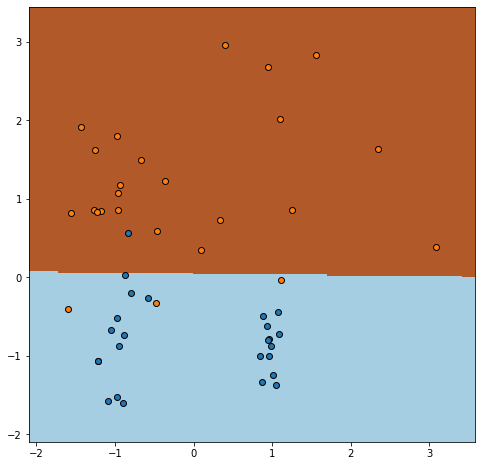

In [ ]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

x_t = np.c_[xx.ravel(),yy.ravel()]

Z = model.predict(x_t)
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], edgecolors='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], edgecolors='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

### Своя реализация линейной регрессии

In [ ]:
X = np.c_[np.ones(len(X)), X]
X

array([[ 1.        , -0.58426249, -0.26304715],
       [ 1.        , -0.87385157,  0.03334535],
       [ 1.        , -0.83376357,  0.56089118],
       [ 1.        , -0.36054172,  1.23330648],
       [ 1.        , -0.96996002, -0.51336961],
       [ 1.        ,  0.87096085, -1.33644586],
       [ 1.        ,  0.88714034, -0.49693129],
       [ 1.        , -0.97267638,  1.8062936 ],
       [ 1.        , -1.56089158,  0.81454957],
       [ 1.        ,  1.05054058, -1.36505594],
       [ 1.        ,  0.9851866 , -0.87000251],
       [ 1.        ,  1.55985218,  2.83593357],
       [ 1.        ,  0.93879173, -0.6224016 ],
       [ 1.        ,  0.33585538,  0.73504779],
       [ 1.        , -0.93897517,  1.18220327],
       [ 1.        , -0.88659662, -0.73309719],
       [ 1.        , -0.89879515, -1.59444315],
       [ 1.        ,  1.09571977,  2.02411724],
       [ 1.        , -1.59503021, -0.40847071],
       [ 1.        , -1.17747512,  0.84767099],
       [ 1.        , -1.21644763, -1.067

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def logloss(y, y_proba):
    logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30))
    logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
    logloss_total = -(logloss_0 + logloss_1) / len(y)
    return logloss_total


def gr_logloss(X, W, y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y_proba - y)
    return grad

In [ ]:
def visualize(W):
    x_t_ones = np.c_[np.ones(x_t.shape[0]), x_t]

    y_proba = sigmoid(x_t_ones @ W)
    Z = np.where(y_proba >= 0.5, 1, 0)

    Z = Z.reshape(xx.shape)

    plt.figure(1, figsize=(8,8))
    plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], edgecolors='k')
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], edgecolors='k')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks()
    plt.show()

Итерация: 0
Logloss 2.259021790386789
Accuracy 0.14
--------------------------------------------------------


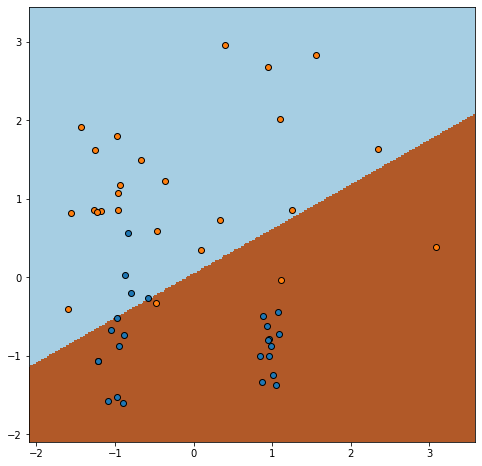

Итерация: 70
Logloss 0.3558220178313083
Accuracy 0.92
--------------------------------------------------------


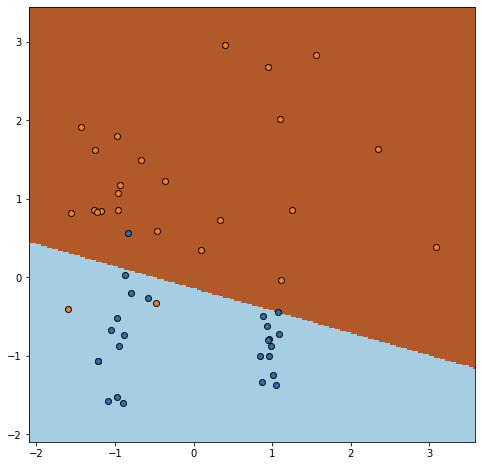

Итерация: 140
Logloss 0.20385651072325695
Accuracy 0.9
--------------------------------------------------------


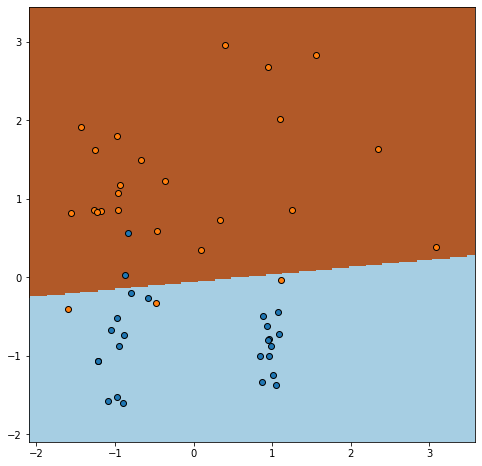

Итерация: 210
Logloss 0.27279613823859705
Accuracy 0.88
--------------------------------------------------------


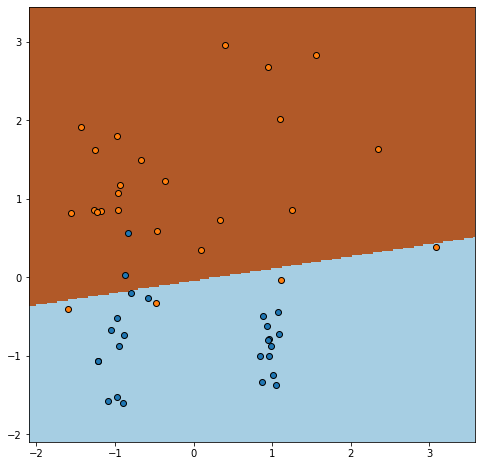

In [ ]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# первоначальное точка
np.random.seed(8)
W = np.random.randn(X.shape[1])

# размер шага (learning rate)
learning_rate = 0.001

next_W = W

# количество итерация
n = 250
for i in range(n):
    cur_W = next_W

    # движение в негативную сторону вычисляемого градиента
    next_W = cur_W - learning_rate * gr_logloss(X, W, y)

    # остановка когда достигнута необходимая степень точности
    if np.linalg.norm(cur_W - next_W) <= eps:
        break

    if i % 70 == 0:
        print(f"Итерация: {i}")
        # print(f"Текущая точка {cur_W}| Следующая точка {next_W}")
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print(f"Logloss {logloss(y, y_proba)}")
        print(f"Accuracy {accuracy}")
        print("--------------------------------------------------------")

        visualize(next_W)

In [ ]:
next_W

array([ 0.38352166, -1.55677194,  9.11878295])

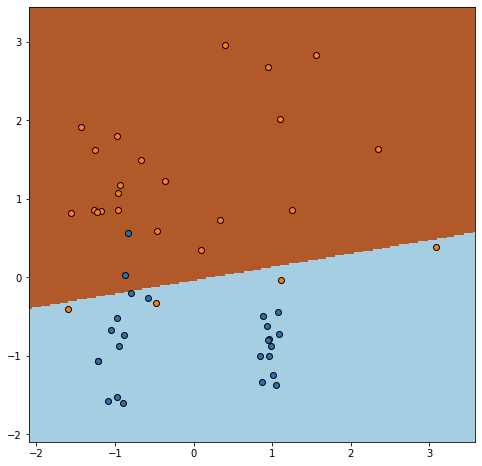

In [ ]:
visualize(next_W)

## Summary

Вот мы и разобрались, как обучается модель логистическая регрессия вручную
1. Перешли от линейной регрессии к логистической регрессии
1. Осознали, что такое правдоподобие
2. Вывели из правдоподобия функцию потерь logloss
3. Построили с нуля логистическую регрессию
4. Пообучали логистическую регрессию из sklearn
5. Визуализировали предсказания логистической регрессии

Муррр ♥